![class_reg](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/regression-vs-classification-in-machine-learning.png)

___
#### <font color=#FF00BB> due midnight Saturday </font>  Rohan Ponramesh
___
# <font color=#00BBFF> HW: Introduction to Classification and Project</font>

## <font color=green> Question 1: Classification (40 points) </font>

The goal of this HW is for you to explore classification in more depth, in part because you _might_ want to use it in your final project but also because it is a very important tool for finding patterns in data. Many of the datasets you are using are great for classification; for example, the classic iris and penguin datasets. 

This HW has two parts: classification and your final project. 

This HW illustrates an extremely important aspect of classification. What you will see is that, despite some naive similarities, classification is quite different from regression in practice.

Once again, you'll use the iris dataset since you now have a lot of intuition for it. 

Because you need to finalize your project, I want the first part of this HW to be short. What I have done is written the entire code for you. All you need to do is read the notebook, answer some questions and comment the code. 

One comment before we dive into the code. The iris dataset is known to be "easy". If we use these powerful ML models on the complete dataset, we often get a perfect prediction. For this reason, I grab only the first two columns in line 11. 

Change the choice of two columns to be 3 or 4 columns and compare the scores you get; this is a very nice ML lesson. 

In your Jupyter environment, turn on line numbers.












____

## Step 1: Get Data

In [169]:
# comment every line, unless it is very obvious (e.g., NumPy)
# in particular, what do the sklearn libraries do? (use the online documentation)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets # Importing the datasets module from sklearn library
from sklearn.model_selection import train_test_split # Importing train_test_split function from 
from sklearn.preprocessing import StandardScaler # Importing StandardScaler class from sklearn.preprocessing module

iris_data = datasets.load_iris() # Loading the Iris dataset from sklearn datasets
X = iris_data.data[:, :2] # Extracting the first two columns (features) of the Iris datase
y = iris_data.target # Extracting the target variable from the Iris datase, type of Iris


The `sklearn` libraries used here provide machine learning functionalities:

- `datasets`: Contains various sample datasets, including the famous Iris dataset (`datasets.load_iris()` loads the Iris dataset).
- `train_test_split`: A function used to split datasets into training and testing subsets.

- `StandardScaler`: A class used for standardization, scaling features by removing the mean and scaling to unit variance.

The code snippet provided loads the Iris dataset, extracts the first two columns as features (`X`), and the target variable (`y`).

____
## Step 2: Preprocess Data

What is being done below contains a small subtlety. In line 8, a scaler is instantiated (created for use), but it isn't used until line 9. In line 9, the scaler only learns from the data how to do the scaling - *it doesn't actually do the scaling!* 

Why? This is so that you can use that information to scale anything you want using the rules it learned. For example, we learn the scaling from the training data (line 9), but we scale **both** the training and test in lines 11 and 13. 

This is a very common pattern in `sklearn`: instantiate an object, then use it on the data separately, perhaps multiple times. 


Why we would do this? The reason is that in the real world we would only have the training data - we cannot learn how to scale the data from data we have never seen. But, once we learn a good scaling and train our ML models using that rule, we should apply it to future data, which could be our test data or real world data once the ML is deployed. 

In [170]:
# comment every line in detail

start_state = 42  # Setting a seed value for the random number generator to ensure reproducibility
test_fraction = 0.2  # Defining the fraction of data to be used as test data (20% in this case)

# Splitting the data into training and testing sets using train_test_split function
# X and y are the feature and target datasets respectively
# test_size=test_fraction specifies the fraction of the data to be used for testing
# random_state=start_state sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, random_state=start_state)

my_scaler = StandardScaler()  # Creating an instance of StandardScaler to scale the features

my_scaler.fit(X_train)  # Fitting the scaler using the training data (X_train)


X_train_scaled = my_scaler.transform(X_train)  # Transforming the training features using the fitted scaler

X_test_scaled = my_scaler.transform(X_test)  # Transforming the test features using the same fitted scaler


The target variable (y_train) is not in fit because StandardScaler only operates on the feature data.

The  method is used to compute the mean and standard deviation necessary for feature scaling. In the case of `StandardScaler`, it only operates on the feature data (`X_train`) to calculate the mean and standard deviation of each feature independently. The target variable (`y_train`) is not used because feature scaling/scaling functions typically operate only on the feature data and our `y_train` having categorical target values for different Iris .

 `StandardScaler` scales the values so that they have a mean of 0 and a standard deviation of 1. It follows the formula:
   
   $$ z = \frac{x - \text{mean}(x)}{\text{std}(x)} $$
   
   where $ x $ is the original value, ${mean}(x)$ is the mean of the feature, ${std}(x)$ is the standard deviation of the feature, and \( z \) is the standardized value.


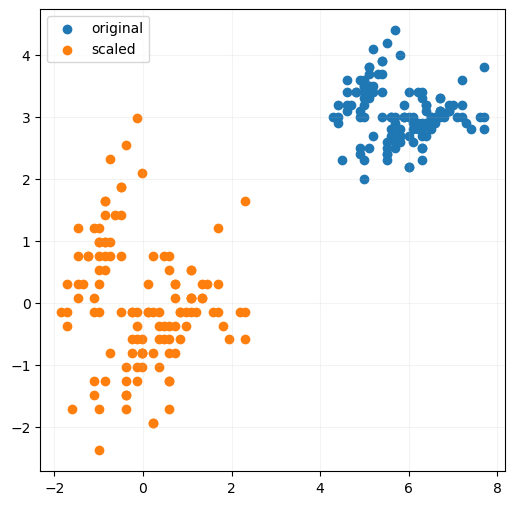

In [171]:
# comment non-obvious lines

plt.figure(figsize=(6,6)) 

# Creating a scatter plot of the original training data points
# X_train[:,0],X_train[:,1] represents the feature for x-axis and feature for y-axis respectively
plt.scatter(X_train[:,0], X_train[:,1], label='original')

# Creating a scatter plot of the scaled training data points from my_scaler used in above sell to transform the original data
# X_train_scaled[:,0], X_train_scaled[:,1] represents the feature for x-axis and y-axis respectively
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], label='scaled')

plt.grid(alpha=0.15)  # Adding a grid to the plot

plt.legend()  # Displaying a legend showing the labels 'original' and 'scaled' 


We can observe that the patten scatter of original and scaled is the same, and the scaled data lies with mean near the origin

____
## Step 3: Learn!

I don't usually like putting import statements down here, but I wanted to group them away from the others above. 

What I really want you to see is that the estimator could be anything - here, I use two and most of the code is totally unchanged! Add many more classifiers  - run them all!

Note that the ML libraries are very short and follow the same pattern: this allows you to very quickly and easily compare many classification libraries. It is a good habit to always compare several estimators, since you don't usually know which one will perform best. 

In [172]:
# switch between the classifiers and rerun the code

from sklearn.tree import DecisionTreeClassifier
my_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)

my_model = my_classifier.fit(X_train_scaled, y_train)

my_model.score(X_test_scaled, y_test)

# score = 0.6333333333333333

0.6333333333333333

In [173]:
from sklearn import neighbors
n_neighbors = 2
my_classifier = neighbors.KNeighborsClassifier(n_neighbors)
my_model = my_classifier.fit(X_train_scaled, y_train)

my_model.score(X_test_scaled, y_test)
 
#score= 0.7

0.7

In [189]:
from sklearn.linear_model import SGDClassifier

my_classifier= SGDClassifier(loss='log_loss', alpha=0.001, max_iter=10000, random_state=start_state)
my_model = my_classifier.fit(X_train_scaled, y_train)

my_model.score(X_test_scaled, y_test)

#score= 0.7

0.7666666666666667

In [175]:
from sklearn.ensemble import AdaBoostClassifier

n_estimator = 100
my_classifier = AdaBoostClassifier(n_estimators=n_estimator,learning_rate=1,random_state=start_state)
my_model = my_classifier.fit(X_train_scaled, y_train)

my_model.score(X_test_scaled, y_test)

#score= 0.7

0.7

In [190]:
from sklearn.ensemble import RandomForestClassifier

n_estimator = 100
my_classifier = RandomForestClassifier(n_estimators=n_estimator,random_state=start_state)
my_model = my_classifier.fit(X_train_scaled, y_train)

my_model.score(X_test_scaled, y_test)

my_classifier_final=my_classifier
X_test_scaled_final=X_test_scaled
#score= 0.7666666666666667


1. **DecisionTreeClassifier (Criterion: Gini):** Score = 0.6333
   - The `DecisionTreeClassifier` with the Gini criterion resulted in a score of approximately 0.6333 on the test set. This classifier tends to create a single decision tree that might not generalize well to new data.

2. **KNeighborsClassifier:** Score = 0.7
   - The `KNeighborsClassifier` with `n_neighbors=2` achieved a score of approximately 0.7. It relies on the nearest neighbors' voting to make predictions. This score might indicate better performance than the Decision Tree but could be sensitive to the number of neighbors chosen.

3. **SGDClassifier (Loss: log):** Score = 0.7667
   - The `SGDClassifier` with `loss='log_loss'` and other parameters obtained a score of approximately 0.76667. This classifier uses stochastic gradient descent and the specified loss function (sigmoid). It might perform well on linear problems but the chosen loss function can significantly impact the results.

4. **AdaBoostClassifier:** Score = 0.7
   - The `AdaBoostClassifier` with `n_estimators=100` and `learning_rate=1` yielded a score of approximately 0.7. AdaBoost combines multiple weak classifiers to create a strong ensemble, but in this case, it might not have significantly improved over individual classifiers.

5. **RandomForestClassifier:** Score = 0.7667
   - The `RandomForestClassifier` with `n_estimators=100` achieved the highest score of approximately 0.7667. Random Forest is an ensemble method using multiple decision trees, and it often performs well due to its ability to reduce overfitting and variance.

### Observations:
- The RandomForestClassifier and  SGDClassifier outperformed other classifiers, suggesting its better performance on the classification in the Iris dataset.


____

### Predictions

With everything trained, you can deploy the model and make predictions. All you need to do is pass in an $X$ and the model will return a $y$. Let's try this with the test data. Comment the code and add a markdown cell to explain your results. 

In [177]:
y_pred = my_model.predict(X_test_scaled)

In [178]:
y_test - y_pred

array([ 0,  0,  0,  0, -1,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0])

Describe in detail what this does.

In [179]:
from sklearn.model_selection import cross_val_score
cross_val_score(my_classifier, X, y, cv=5)

array([0.73333333, 0.76666667, 0.66666667, 0.8       , 0.76666667])

cross_val_score is used for evaluating an estimator's performance by employing cross-validation techniques



  - `cross_val_score` returns an array containing the evaluation scores (e.g., accuracy, F1 score, etc., depending on the scoring metric used) of the classifier for each fold during cross-validation.
  
  the given code generates array with 5 elements (in a 5-fold cross-validation scenario), each element representing the performance score of the classifier on a different fold of the data.

The purpose of using `cross_val_score` is to get an estimate of the model's performance that is more reliable. By performing cross-validation, it helps in assessing how well the model generalizes to unseen data by training and testing on different subsets of the dataset, reducing the risk of overfitting or underfitting.


At this point, you should go back and play with the number of columns and the scaling. If you use 3 columns does the score go up or down? What if you comment out the code that scales the data - does that impact the score? 

Create a markdown cell to answer these questions in detail. 

In [180]:
X_newcol = iris_data.data[:, :3] # Extracting the remaining two columns (features) of the Iris dataset col 3 and 4
y_newcol = iris_data.target # Extracting the target variable from the Iris datase, type of Iris


X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_newcol, y_newcol, test_size=test_fraction, random_state=start_state)

my_scaler.fit(X_train_n)  # Fitting the scaler using the training data (X_train)


X_train_scaled_n = my_scaler.transform(X_train_n)  # Transforming the training features using the fitted scaler

X_test_scaled_n = my_scaler.transform(X_test_n)  # Transforming the test features using the same fitted scaler



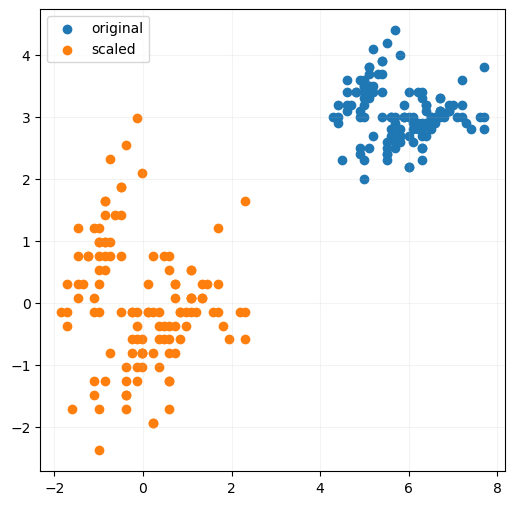

In [181]:
plt.figure(figsize=(6,6)) 


plt.scatter(X_train_n[:,0], X_train_n[:,1], label='original')

plt.scatter(X_train_scaled_n[:,0], X_train_scaled_n[:,1], label='scaled')

plt.grid(alpha=0.15) 

plt.legend()  

In [182]:
my_classifier

RandomForestClassifier(random_state=42)

In [183]:
my_model = my_classifier.fit(X_train_scaled_n, y_train_n)

my_model.score(X_test_scaled_n, y_test_n)


0.9666666666666667

In [184]:
y_pred_n = my_model.predict(X_test_scaled_n)

In [185]:
y_test_n - y_pred_n

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [186]:
#non scaled
my_model = my_classifier.fit(X_train_n, y_train_n)

my_model.score(X_test_n, y_test_n)


0.9666666666666667

The models prediction accuracy is increased while considering the third feature,  Score is not affetcted when we remove the scaling values for X_train and X_test

____
____
## Step 4:  The Interesting Part!!

Everything above is pretty straightforward. If you were doing, say, regression, nearly everything would be identical once you swapped regression estimators for the classifiers. 

Now, I want to introduce you to a very important metric that is _used for classification specifically_. This metric is called the confusion matrix. 

Let's bring the code in. (Again, I would normally put this at the top, but I want to you see it here...)


In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

You might have heard of a confusion matrix before. If not, you have certainly heard of "false positives" and "false negatives" - we use that terminology in our everyday speech. [Read this to review/learn the basic ideas.](https://en.wikipedia.org/wiki/Confusion_matrix) 

The [code](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) is simple:

In [164]:
conf_mat = confusion_matrix(y_test, y_pred)

In [165]:
print(conf_mat)

[[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]


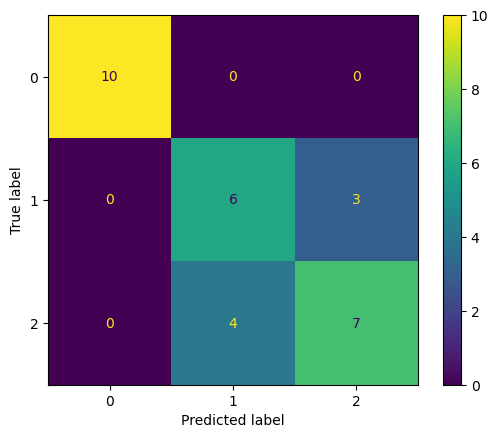

In [168]:
ConfusionMatrixDisplay.from_estimator(my_classifier_final, X_test_scaled_final, y_test)

In a markdown cell, describe what [this displays](https://en.wikipedia.org/wiki/Confusion_matrix). Interpret its meaning in terms of FPs, FNs, etc. Change things (number of columns, estimator) to see how the confusion matrix is impacted. 

If you do classification for your final project, you want to include a confusion! It tells you how well your classifier is working; and, it tells **how** it fails when it does. 

The confusion matrix provides a summary of the predicted and actual classifications made by a classifier on a dataset. The matrix layout comprises four different combinations of predicted and actual classes:

### Components of Confusion Matrix:
1. **True Positive (TP)**: Instances where the model predicted the positive class correctly.
2. **True Negative (TN)**: Instances where the model predicted the negative class correctly.
3. **False Positive (FP)**: Instances where the model predicted the positive class incorrectly (it's actually negative).
4. **False Negative (FN)**: Instances where the model predicted the negative class incorrectly (it's actually positive).

### Structure of Confusion Matrix:


|       |      |
| ------------------- | ------------------- |
|  True Negatives     |   False Positives   |
| ------------------- | ------------------- |
|   False Negatives   |   True Positives    |



### Interpretation of Confusion Matrix Components:
- **True Positives (TP)**: These are instances correctly identified as belonging to the positive class. For example, correctly identifying diseased patients as having the disease.
- **True Negatives (TN)**: Instances correctly identified as not belonging to the positive class. For instance, correctly identifying healthy individuals as not having the disease.
- **False Positives (FP)**: Instances incorrectly identified as belonging to the positive class when they actually belong to the negative class. For example, healthy individuals misclassified as having the disease.
- **False Negatives (FN)**: Instances incorrectly identified as not belonging to the positive class when they actually belong to the positive class. For instance, diseased patients misclassified as healthy.

### Impact of Changes on Confusion Matrix:
- **Number of Columns/Classes**: If the number of columns (i.e., number of classes) changes in the confusion matrix, the matrix size will be affected, and the counts in TP, TN, FP, and FN will correspond to the specific classification scenarios based on the new class structure.
- **Estimator/Model Changes**: Different models or estimators may produce varying confusion matrices based on their predictive capabilities, which might affect the distribution of TP, TN, FP, and FN values, potentially resulting in different classification performance evaluations.

Changing the number of columns (classes) or using different estimators might influence the model's ability to correctly classify instances into different classes, thereby impacting the counts in the confusion matrix and its subsequent interpretation in terms of FP, FN, TP, and TN.

____

# <font color=#AA00FF> Question 2: Final Project (10 Points) </font>

For the second part of the HW, we are focusing on the final project. While the first project was mainly focused on exploration of a dataset using data science methods (EDA, IDA, Visualization, Imputation, ...), the final project is focused on implementing modeling methods which could be drawn from machine learning methods (linear regression, neural networks, support vector machines, gaussian process regression/classification, KNN, and any other regression-classification technique) as an exploratory or a predictive tool. <font color=darkred> **Detailed instructions are provided in the "Final Project" Documentation (can be found on D2L and Slack), which will guide your effort to develop appropriate web app for the submission!!** <font> 

    
### Provide a summary of the final project requirements based on the information in the Final Project documentation.

____

    
    


The final project requirements aim to leverage machine learning methods to develop a Streamlit web application deployed on GitHub. Emphasis is placed on professionalism, interactivity, a clear goal, narrative, organization, and visualizations while avoiding walkthroughs and ensuring error-free functionality. Below is a summary of key points for the final project:

### Project Focus:
- **Modeling Methods**: Implement machine learning models (e.g., linear regression, neural networks, SVM, etc.) either on a new dataset or as an addition to the previous project.
- **Streamlit App**: Develop a professional, realistic, and intuitive Streamlit web app as if developing for a company, not just a class project.

### Project Requirements:
- **Goal-Oriented**: Have a clear goal or purpose, going beyond basic Exploratory Data Analysis (EDA).
- **Narrative**: Develop a coherent storyline that connects different project components and leads users to reach similar conclusions or understanding.
- **Organized Structure**: Organize the app into sections or tabs, providing a convenient layout for users.
- **Introduction**: Include a compelling introduction that informs users about the app's purpose and functionality.
- **Bio Section**: Add a bio tab providing personal information, skills, hobbies, and interests to add a personal touch.
- **Interactivity**: Ensure interactivity through Streamlit functionality and interactive visualizations using libraries like Plotly or Altair.
- **Visualization**: Use meaningful and professional visualizations that serve a purpose, avoiding unnecessary exploration and 3D visualizations.
- **Error-Free Functionality**: Ensure smooth operation and functionality of the web app, considering various user inputs and interactions.
- **Limiting Features**: Limit feature selection in visualizations to maintain simplicity and user comprehension.
- **Avoid Walkthroughs**: Avoid presenting content as a basic walkthrough, focusing on a professional showcase of skills.

### Final Presentation:
- Present the project as a professional product, avoiding academic language or project terminology.
- Aim to showcase skills, problem-solving capabilities, and understanding of the data/problem.



Now that you have understood the description and the requirements of the final project, for the remainder of this HW, use the time to complete your project. If you have any issues or questions let us know! 
